<a href="https://colab.research.google.com/github/pranavkantgaur/gamd_sr/blob/main/sr_for_lj_potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.0 on the current Colab Runtime...
2024-12-02 06:19:45 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.0-linux-x86_64.tar.gz [168592090/168592090] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
  Threads: 3 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [103]:
using Pkg
Pkg.add("SymbolicRegression")
Pkg.add("MLJ")
Pkg.add("MLJBase")
Pkg.add("Plots")
Pkg.add("PyCall")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed PooledArrays ─── v1.4.3
   Installed SentinelArrays ─ v1.4.7
   Installed InlineStrings ── v1.4.2
   Installed DataFrames ───── v1.7.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [

In [57]:
#using PyCall
#run(`ls $(PyCall.pyimport("os").path.expanduser("~"))`)

#run(`ls /root/.julia`)
run(`tar -czf julia_packages.tar.gz /root/.julia`)
#from google.colab import files
#files.download('julia_packages.tar.gz')


tar: Removing leading `/' from member names


Process(`tar -czf julia_packages.tar.gz /root/.julia`, ProcessExited(0))

## Test SR on synthetic LJ potential dataset

## Test SR on GNN edge message dataset

In [229]:
using PyCall

# Import the pickle module from Python
@pyimport pickle

# Function to load a pickle file
function load_pickle(filename)
    try
        # Read the entire content of the file as bytes
        bytes = read(filename)  # This reads the file content into a Vector{UInt8}

        # Use pickle.loads() to load the data from bytes
        return pickle.loads(pybytes(bytes))  # Convert bytes to a Python bytes object
    catch e
        println("Error loading pickle file: ", e)
        return nothing  # Return nothing if there was an error
    end
end

# Example usage
msg_force_dict_pkl_filename = "/content/msg_force_dict_epoch=29-step=270000_edge_msg_constrained_std_trained_over_9k_samples_our_run_5.pkl"
#msg_force_dict_pkl_filename = "/content/msg_force_dict_epoch=29-step=270000_edge_msg_constrained_std_trained_over_9k_samples_our_run_5_on_gamd_dataset.pkl"
#msg_force_dict_pkl_filename = "/content/msg_force_dict_epoch=29-step=135000_edge_msg_constrained_std_trained_over_4.5k_samples_custom_potential.pkl"
msg_force_dict = load_pickle(msg_force_dict_pkl_filename)

# Displaying the loaded data
if msg_force_dict !== nothing
    println("Loaded data: ", msg_force_dict.keys)
else
    println("Failed to load data.")
end


Loaded data: Any["dz", #undef, #undef, #undef, #undef, "potential_gt", #undef, #undef, #undef, "aggregate_edge_messages", "dy", #undef, #undef, #undef, "edge_messages", #undef, #undef, "net_force_gt", "force_gt", #undef, #undef, "radial_distance", "node_embeddings", #undef, #undef, #undef, #undef, "dx", "pos", #undef, #undef, #undef]


Standard Deviation of Y values: 0.09319757040003165


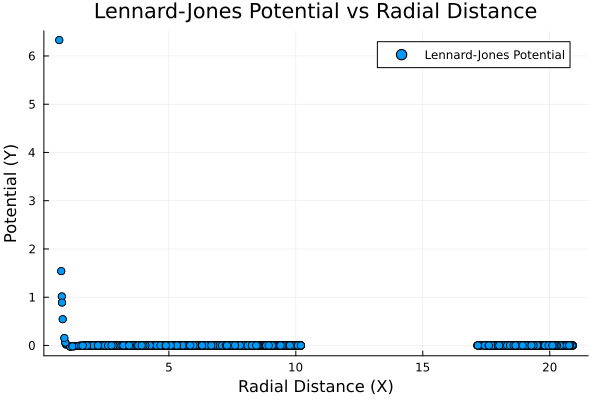

In [230]:
using LinearAlgebra
using Plots

# Set parameters for Lennard-Jones potential
epsilon = 0.0238  # Depth of the potential well
sigma = 0.98#3.4    # Finite distance at which the potential is zero

@pyimport torch
@pyimport numpy as np

using DataFrames

X = msg_force_dict["radial_distance"].cpu().numpy()


# Calculate Lennard-Jones potential for each radial distance
Y = [
     4.0 * epsilon * ((sigma / norm(X[i, :]))^12 - (sigma / norm(X[i, :]))^6)
     #(-(sigma / norm(X[i, :]))^6)
     #((sigma / norm(X[i, :]))^12)
     #((sigma / norm(X[i, :]))^12 - (sigma / norm(X[i, :]))^6)
    for i in eachindex(axes(X, 1))
]

# Calculate the standard deviation of Y values
std_dev_Y = np.std(Y)
# Print or return the standard deviation
println("Standard Deviation of Y values: ", std_dev_Y)



# Y now contains the Lennard-Jones potentials corresponding to each radial distance


# Plotting Y as a function of X
plot(X, Y, seriestype = :scatter, label = "Lennard-Jones Potential", xlabel = "Radial Distance (X)", ylabel = "Potential (Y)", title = "Lennard-Jones Potential vs Radial Distance", legend = true)

Standard Deviation of Y values: 0.9019511342048645


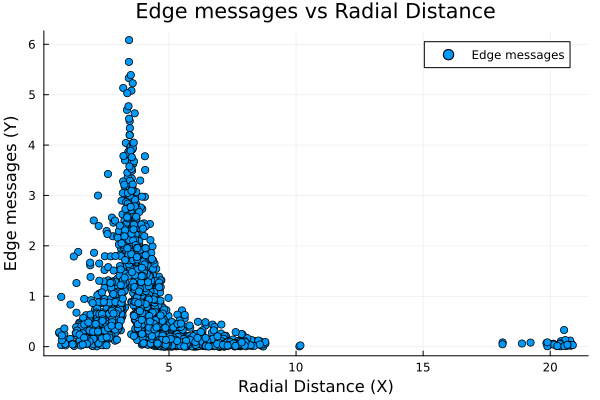

In [313]:
@pyimport torch
@pyimport numpy as np

using DataFrames

X = msg_force_dict["radial_distance"].cpu().numpy()


edge_messages_julia = msg_force_dict["edge_messages"].cpu().numpy()
Y = edge_messages_julia[:, 3] # Get all rows and the first column (Julia indexing starts at 1)

# Create a mask
mask = (0 .<= Y) #.& (10.0 .>= X)

# Filter X and Y using the mask
X = X[mask]
Y = Y[mask]

# Calculate the standard deviation of Y values
std_dev_Y = np.std(Y)

# Print or return the standard deviation
println("Standard Deviation of Y values: ", std_dev_Y)

# Plotting Y as a function of X
plot(X, Y, seriestype = :scatter, label = "Edge messages", xlabel = "Radial Distance (X)", ylabel = "Edge messages (Y)", title = "Edge messages vs Radial Distance", legend = true)

# Downsample edge messages (to map it to a function)

Downsampled X: [0.6837487816810608, 0.7611945867538452, 0.7843222618103027, 0.8833189606666565, 0.9221863746643066, 0.9347423315048218, 0.9554005265235901, 1.1178250312805176, 1.1248584985733032, 1.2061526775360107, 1.2558584213256836, 1.2719402313232422, 1.3332065343856812, 1.35009765625, 1.360796570777893, 1.3834803104400635, 1.428061604499817, 1.4744751453399658, 1.4831156730651855, 1.5340352058410645, 1.5516337156295776, 1.5760418176651, 1.60710608959198, 1.6253254413604736, 1.6615104675292969, 1.6657094955444336, 1.6870378255844116, 1.7148666381835938, 1.7392804622650146, 1.7549231052398682, 1.7670782804489136, 1.7683045864105225, 1.8250889778137207, 1.8257226943969727, 1.8276509046554565, 1.8653252124786377, 1.8761639595031738, 1.8810267448425293, 1.8995082378387451, 1.9034788608551025, 1.9056251049041748, 1.9141372442245483, 1.9165619611740112, 1.9330936670303345, 1.9560502767562866, 1.9889984130859375, 1.9957712888717651, 2.0167951583862305, 2.024165630340576, 2.025913715362549

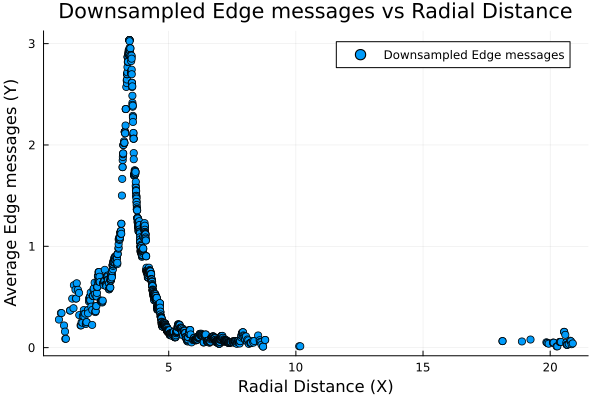

In [314]:
# Define the window size for downsampling
window_size = 0.1  # Adjust this value as needed

# Create arrays to store downsampled results
downsampled_X = Float64[]
downsampled_Y = Float64[]

# Get unique X values for downsampling
unique_X_values = sort(unique(X))

# Iterate over unique X values and compute averages within the window
for x in unique_X_values
    # Find indices of Y values within the window around x
    indices_in_window = findall((X .>= (x - window_size / 2)) .& (X .<= (x + window_size / 2)))

    if !isempty(indices_in_window)
        # Calculate average of Y values in this window
        avg_Y = mean(Y[indices_in_window])

        # Check if x is already in downsampled_X before adding it
        if x in downsampled_X
            continue  # Skip if x is already present
        else
            # Append results to downsampled arrays
            push!(downsampled_X, x)
            push!(downsampled_Y, avg_Y)
        end
    end
end

# Convert results to arrays if needed
X = collect(downsampled_X)
Y = collect(downsampled_Y)

# Print or return the downsampled results
println("Downsampled X: ", X)
println("Downsampled Y: ", Y)

# Plotting downsampled Y as a function of downsampled X
plot(X, Y, seriestype = :scatter, label = "Downsampled Edge messages", xlabel = "Radial Distance (X)", ylabel = "Average Edge messages (Y)", title = "Downsampled Edge messages vs Radial Distance", legend = true)

Final Downsampled X: [3.5139660835266113, 3.517524003982544, 3.520376205444336, 3.523153781890869, 3.524637222290039, 3.5355184078216553, 3.53879976272583, 3.542799234390259, 3.5439794063568115, 3.545748472213745, 3.5514895915985107, 3.551561117172241, 3.5548574924468994, 3.559302568435669, 3.5688157081604004, 3.572016954421997, 3.5736422538757324, 3.574533224105835, 3.5821120738983154, 3.5869557857513428, 3.590895175933838, 3.5928969383239746, 3.5929999351501465, 3.594107151031494, 3.604860305786133, 3.6116623878479004, 3.6133742332458496, 3.6188604831695557, 3.6190662384033203, 3.6201653480529785, 3.6242361068725586, 3.6248886585235596, 3.6382057666778564, 3.6384518146514893, 3.643143653869629, 3.6469829082489014, 3.6509525775909424, 3.6514315605163574, 3.6542274951934814, 3.6545159816741943, 3.6586825847625732, 3.6595640182495117, 3.6622025966644287, 3.664945363998413, 3.6683104038238525, 3.6705615520477295, 3.67561674118042, 3.6767220497131348, 3.6796157360076904, 3.680083990097046

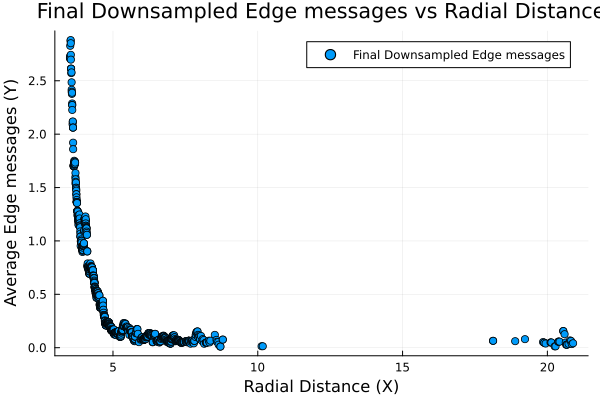

In [318]:
# Remove rows where downsampled_X is less than 2
mask_final = (X .>= 3.5)

# Filter downsampled arrays using the final mask
X = X[mask_final]
Y = Y[mask_final]

# Print or return the final downsampled results
println("Final Downsampled X: ", X)
println("Final Downsampled Y: ", Y)

# Plotting final downsampled Y as a function of final downsampled X
plot(X, Y, seriestype = :scatter, label = "Final Downsampled Edge messages", xlabel = "Radial Distance (X)", ylabel = "Average Edge messages (Y)", title = "Final Downsampled Edge messages vs Radial Distance", legend = true)

In [319]:
X = vec(Float64.(X)) # Convert X to Float64
Y = vec(Float64.(Y))
# Convert X to a DataFrame with a single column
X = DataFrame(radial_distance = X)
X = Dict(:radial_distance => X.radial_distance)

Dict{Symbol, Vector{Float64}} with 1 entry:
  :radial_distance => [3.51397, 3.51752, 3.52038, 3.52315, 3.52464, 3.53552, 3.5388, 3.5428, 3.5439…

In [320]:
using SymbolicRegression
function lj_potential_structure((; attr_func, rep_func), (rad, ))
  _attr_func = attr_func(rad)^-12
  _rep_func = rep_func(rad)^-6

  out = map((attr_func_i, rep_func_i) -> (attr_func_i - rep_func_i), _attr_func.x, _rep_func.x)
  return ValidVector(out, _attr_func.valid && _rep_func.valid)
end
lj_structure = TemplateStructure{(:attr_func, :rep_func)}(lj_potential_structure)

(::TemplateStructure{(:attr_func, :rep_func), typeof(lj_potential_structure), @NamedTuple{attr_func::Int64, rep_func::Int64}}) (generic function with 0 methods)

In [321]:
elementwise_loss = ((x1), (y1)) -> abs(y1 - x1)

#111 (generic function with 1 method)

In [322]:
using MLJBase

model = SRRegressor(;
    niterations=100,
    selection_method=SymbolicRegression.MLJInterfaceModule.choose_best,
    binary_operators=(*, /),
    maxsize=15,
    elementwise_loss=elementwise_loss,
    expression_type=TemplateExpression,
    # Note - this is where we pass custom options to the expression type:
    expression_options=(; structure = lj_structure),
    batching=true,
)


mach = machine(model, X, Y)
fit!(mach)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/kVZZH/src/ProgressMeter.jl:594
Evolving for 100 iterations... 100%|█████████████████████████████████████████| Time: 0:02:20


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           3.887e-01  1.802e+01  ╭ attr_func = -1.1371
                                  ╰ rep_func = -2.6961
4           1.735e-01  4.033e-01  ╭ attr_func = #1 * -0.25912
                                  ╰ rep_func = -4953.3
6           1.735e-01  1.226e-10  ╭ attr_func = #1 * -0.25912
                                  ╰ rep_func = #1 * #1
8           1.735e-01  1.861e-08  ╭ attr_func = #1 * -0.25912
                                  ╰ rep_func = #1 * (#1 * 0.43249)
10          1.338e-01  1.298e-01  ╭ attr_func = #1 * 0.23926
                                  ╰ rep_func = (#1 * #1) * (#1 * -0.016842)
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs/20241202_130238_JCmgMk/hall_of_fame.csv


[ Info: Final population:
[ Info: Results saved to:


trained Machine; caches model-specific representations of data
  model: SRRegressor(defaults = nothing, …)
  args: 
    1:	Source @506 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @117 ⏎ AbstractVector{Continuous}


In [323]:
report(mach)

(best_idx = 2,
 equations = TemplateExpression{Float64, TemplateStructure{(:attr_func, :rep_func), typeof(lj_potential_structure), @NamedTuple{attr_func::Int64, rep_func::Int64}}, DynamicExpressions.NodeModule.Node{Float64}, ComposableExpression{Float64, DynamicExpressions.NodeModule.Node{Float64}, @NamedTuple{operators::DynamicExpressions.OperatorEnumModule.OperatorEnum{Tuple{typeof(*), typeof(/)}, Tuple{}}, variable_names::Nothing}}, @NamedTuple{attr_func::ComposableExpression{Float64, DynamicExpressions.NodeModule.Node{Float64}, @NamedTuple{operators::DynamicExpressions.OperatorEnumModule.OperatorEnum{Tuple{typeof(*), typeof(/)}, Tuple{}}, variable_names::Nothing}}, rep_func::ComposableExpression{Float64, DynamicExpressions.NodeModule.Node{Float64}, @NamedTuple{operators::DynamicExpressions.OperatorEnumModule.OperatorEnum{Tuple{typeof(*), typeof(/)}, Tuple{}}, variable_names::Nothing}}}, @NamedTuple{structure::TemplateStructure{(:attr_func, :rep_func), typeof(lj_potential_structure)

In [324]:
r = report(mach)
idx = r.best_idx
best_expr = r.equations[idx]
best_attr = get_contents(best_expr).attr_func
best_rep = get_contents(best_expr).rep_func

print("Attr term: ", best_attr)
print("\nRep term: ", best_rep)


Attr term: x1 * -0.2591152102267429
Rep term: -4953.265710759091

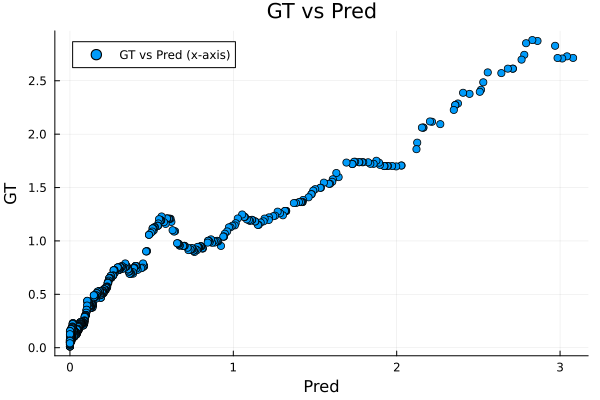

In [325]:
y_pred = predict(mach, X)
# Plotting Y as a function of X
plot(y_pred, Y, seriestype = :scatter, label = "GT vs Pred (x-axis)", xlabel = "Pred", ylabel = "GT", title = "GT vs Pred", legend = true)